##### Hello! In this notebook I plan to see how much the rain affects fremont bike traffic! 
##### i got the rain data from here -> https://www.ncdc.noaa.gov/cdo-web/search
##### and the fremont bike data from here -> https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### currnet weather frame only goes to 2019
rain_data_frame = pd.read_csv('C:/Users/aaron/Code/DataScience/Data/Rain_In_Ballard.csv', parse_dates=[5])
bike_data_frame = pd.read_csv('C:/Users/aaron/Code/DataScience/Data/Fremont_Bridge_Bicycle_Counter_20231106.csv', parse_dates=[0])

rain_data_frame.head(5)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,WESD,WESD_ATTRIBUTES
0,US1WAKG0294,"SEATTLE 4.0 NNW, WA US",47.671842,-122.394856,32.0,2022-05-01,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
1,US1WAKG0294,"SEATTLE 4.0 NNW, WA US",47.671842,-122.394856,32.0,2022-05-02,NaN,NaN,NaN,NaN,0.42,",,N",NaN,NaN,NaN,NaN
2,US1WAKG0294,"SEATTLE 4.0 NNW, WA US",47.671842,-122.394856,32.0,2022-05-03,NaN,NaN,NaN,NaN,0.08,",,N",NaN,NaN,NaN,NaN
3,US1WAKG0294,"SEATTLE 4.0 NNW, WA US",47.671842,-122.394856,32.0,2022-05-04,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
4,US1WAKG0294,"SEATTLE 4.0 NNW, WA US",47.671842,-122.394856,32.0,2022-05-05,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN


In [23]:
##### add day month and year columns for ease

#rain_data_frame['DAY'] = rain_data_frame['DATE'].iloc[:2]

rain_data_frame['DAY'] = rain_data_frame['DATE'].dt.day
rain_data_frame['MONTH'] = rain_data_frame['DATE'].dt.month
rain_data_frame['YEAR'] = rain_data_frame['DATE'].dt.year
rain_data_frame['WEEK_NUM'] = rain_data_frame['DATE'].dt.isocalendar().week
rain_data_frame['DAY_OF_YEAR'] = rain_data_frame['DATE'].dt.timetuple().tm_yday

bike_data_frame['Day'] = bike_data_frame['Date'].dt.day
bike_data_frame['Month'] = bike_data_frame['Date'].dt.month
bike_data_frame['Year'] = bike_data_frame['Date'].dt.year
bike_data_frame['Time'] = bike_data_frame['Date'].dt.time
bike_data_frame['Date_Only'] = bike_data_frame['Date'].dt.date
bike_data_frame['Week_Num'] = bike_data_frame['Date'].dt.isocalendar().week
bike_data_frame['Day_Of_Year'] = bike_data_frame['DATE'].dt.timetuple().tm_yday


#print (datestr.iloc[:3])

AttributeError: 'DatetimeProperties' object has no attribute 'timetuple'

In [25]:
rain_data_frame['DATE'].dt.

In [3]:
rain_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          1174 non-null   object        
 1   NAME             1174 non-null   object        
 2   LATITUDE         1174 non-null   float64       
 3   LONGITUDE        1174 non-null   float64       
 4   ELEVATION        1174 non-null   float64       
 5   DATE             1174 non-null   datetime64[ns]
 6   DAPR             5 non-null      float64       
 7   DAPR_ATTRIBUTES  5 non-null      object        
 8   MDPR             5 non-null      float64       
 9   MDPR_ATTRIBUTES  5 non-null      object        
 10  PRCP             1170 non-null   float64       
 11  PRCP_ATTRIBUTES  1170 non-null   object        
 12  SNOW             665 non-null    float64       
 13  SNOW_ATTRIBUTES  665 non-null    object        
 14  WESD             1 non-null      float64

In [4]:
bike_data_frame.head()

,Date,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk",Day,Month,Year,Time,Date_Only,Week_Num
0,2022-08-01 00:00:00,23.0,7.0,16.0,1,8,2022,00:00:00,2022-08-01,31
1,2022-08-01 01:00:00,12.0,5.0,7.0,1,8,2022,01:00:00,2022-08-01,31
2,2022-08-01 02:00:00,3.0,0.0,3.0,1,8,2022,02:00:00,2022-08-01,31
3,2022-08-01 03:00:00,5.0,2.0,3.0,1,8,2022,03:00:00,2022-08-01,31
4,2022-08-01 04:00:00,10.0,2.0,8.0,1,8,2022,04:00:00,2022-08-01,31


In [5]:
bike_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95640 entries, 0 to 95639
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Date                                                                95640 non-null  datetime64[ns]
 1   Fremont Bridge Sidewalks, south of N 34th St                        95614 non-null  float64       
 2   Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk  95614 non-null  float64       
 3   Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  95614 non-null  float64       
 4   Day                                                                 95640 non-null  int64         
 5   Month                                                               95640 non-null  int64         
 6   Year                                                  

In [6]:
rain_data_frame.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,WESD,WESD_ATTRIBUTES,DAY,MONTH,YEAR,WEEK_NUM
0,US1WAKG0294,"SEATTLE 4.0 NNW, WA US",47.671842,-122.394856,32.0,2022-05-01,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,1,5,2022,17
1,US1WAKG0294,"SEATTLE 4.0 NNW, WA US",47.671842,-122.394856,32.0,2022-05-02,NaN,NaN,NaN,NaN,0.42,",,N",NaN,NaN,NaN,NaN,2,5,2022,18
2,US1WAKG0294,"SEATTLE 4.0 NNW, WA US",47.671842,-122.394856,32.0,2022-05-03,NaN,NaN,NaN,NaN,0.08,",,N",NaN,NaN,NaN,NaN,3,5,2022,18
3,US1WAKG0294,"SEATTLE 4.0 NNW, WA US",47.671842,-122.394856,32.0,2022-05-04,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,4,5,2022,18
4,US1WAKG0294,"SEATTLE 4.0 NNW, WA US",47.671842,-122.394856,32.0,2022-05-05,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN,5,5,2022,18


In [10]:
bike_year_mask = bike_data_frame['Year'] == 2022
year_bike = bike_data_frame[bike_year_mask]

#year_rain.head()


date_group = year_bike.groupby('Week_Num').agg({'Fremont Bridge Sidewalks, south of N 34th St':'mean'}).reset_index()

all_weeks = bike_data_frame.groupby('Week_Num').agg({'Fremont Bridge Sidewalks, south of N 34th St':'mean'}).reset_index()

date_group.head()


,Week_Num,"Fremont Bridge Sidewalks, south of N 34th St"
0,1,34.827381
1,2,48.005952
2,3,56.446429
3,4,55.494048
4,5,58.857143


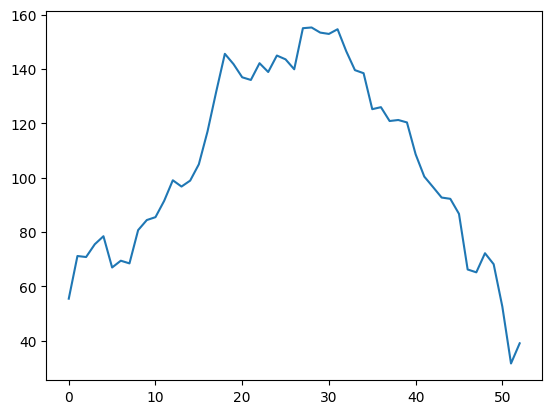

In [9]:
y = all_weeks['Fremont Bridge Sidewalks, south of N 34th St']

plt.plot(y)

In [32]:
year_var = 2021

rain_year = rain_data_frame[rain_data_frame['YEAR'] == year_var]
bike_year = bike_data_frame[bike_data_frame['Year'] == year_var]

In [36]:
#bike_daily_2022 = bike_2022.groupby()

bike_2021_daily = bike_year.groupby('Date_Only').agg({'Fremont Bridge Sidewalks, south of N 34th St':'sum'})

a = bike_2021_daily['Fremont Bridge Sidewalks, south of N 34th St']
b = rain_year['PRCP']

#plt.plot(a,b)

#plt.show()

rain_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 953 to 1173
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          221 non-null    object        
 1   NAME             221 non-null    object        
 2   LATITUDE         221 non-null    float64       
 3   LONGITUDE        221 non-null    float64       
 4   ELEVATION        221 non-null    float64       
 5   DATE             221 non-null    datetime64[ns]
 6   DAPR             0 non-null      float64       
 7   DAPR_ATTRIBUTES  0 non-null      object        
 8   MDPR             0 non-null      float64       
 9   MDPR_ATTRIBUTES  0 non-null      object        
 10  PRCP             221 non-null    float64       
 11  PRCP_ATTRIBUTES  221 non-null    object        
 12  SNOW             153 non-null    float64       
 13  SNOW_ATTRIBUTES  153 non-null    object        
 14  WESD             0 non-null      float6